In [34]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np

In [5]:
people = fetch_lfw_people(min_faces_per_person=5, resize=0.7) #Download

In [7]:
people.target.shape, len(set(people.target_names)), people.images.shape

((5985,), 423, (5985, 87, 65))

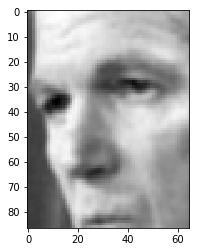

In [26]:
plt.imshow(people.images[10], cmap='gray')

In [97]:
len(set(people.target))

423

In [99]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [101]:
x = people.data
y = people.target
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(pca_x,y)

In [109]:
model = RidgeClassifier(alpha=10).fit(X_train, y_train)

In [110]:
model.score(X_train,y_train), model.score(X_test,y_tes
                                          t)

(0.24509803921568626, 0.1730126920507682)

In [24]:
# (87*65)개 이상의 명암을 주성분 100(10*10)개 변환해서 시각화
from sklearn.decomposition import PCA


C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [81]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data) #whiten : 정규화

In [95]:
pca_x = pca.transform(people.data)
img = pca.components_.reshape([-1,87,65])  #(주성분수, 높이, 너비)
img.shape

pca.components_

array([[-0.00611221, -0.00647472, -0.00681572, ..., -0.00339688,
        -0.00277964, -0.00220638],
       [-0.0125819 , -0.01247174, -0.01253606, ...,  0.02249238,
         0.02127793,  0.02003042],
       [ 0.02712871,  0.02778668,  0.0287442 , ...,  0.01709512,
         0.01631472,  0.01546021],
       ...,
       [ 0.01841876,  0.01713581,  0.01513517, ..., -0.00937494,
        -0.01495238, -0.01713619],
       [-0.00314301, -0.00074008,  0.00283382, ..., -0.02486302,
        -0.03992157, -0.04410886],
       [ 0.0014578 ,  0.00055177, -0.00083821, ..., -0.00447677,
         0.0054444 ,  0.01227413]], dtype=float32)

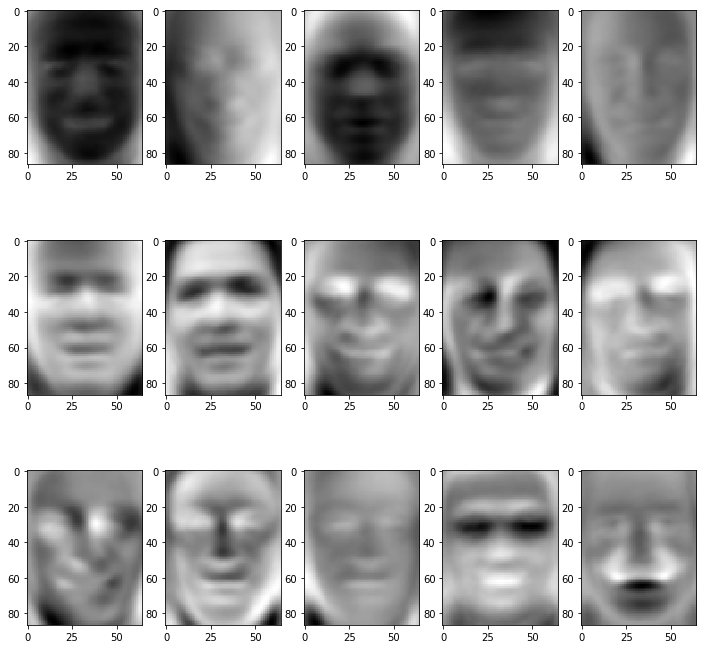

In [93]:
h, w = 3,5
fig, ax = plt.subplots(3,5,figsize=(12,12))
for y  in range(h):
    for x in range(w) :
        ax[y,x].imshow(img[y*5+x], cmap='gray')

C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\wtime\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[ 60.333332, ...,   9.333333],
       ...,
       [144.66667 , ...,  28.333334]], dtype=float32), 
array([[ 60.333332, ...,   9.333333],
       ...,
       [144.66667 , ...,  28.333334]], dtype=float32))
________________________________________________________pca_faces - 7.3s, 0.1min


TypeError: Invalid dimensions for image data

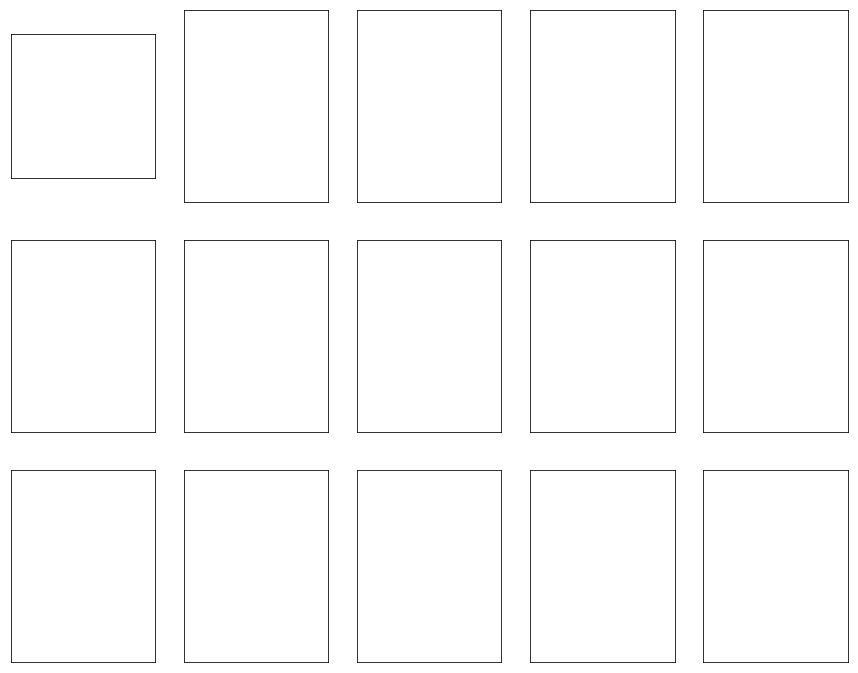

In [94]:
import mglearn
mglearn.plots.plot_pca_faces(people.data,people.data, people.data[0].shape)